
# K Means Clustering with Python



## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check out the Data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
#Create Data (فراموش نکنیم این الگوریتم نیاز به اسکیل داده ها دارد ولی در این مثال خود داده ها از پیش اسکیل شده اند)
data = make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.8,random_state=101)

In [4]:
data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

In [6]:
data[0]

array([[-6.42884095e+00,  1.01411174e+01],
       [ 5.86867888e+00,  5.20110356e+00],
       [-3.76109375e-01,  3.26427943e+00],
       [ 2.16679181e+00,  9.56300522e+00],
       [ 5.09508570e+00,  7.20752718e+00],
       [-1.08788882e+01, -6.11318040e+00],
       [ 2.03405554e+00,  9.76664755e+00],
       [-1.71798771e+00,  1.41401140e+00],
       [ 1.16911341e+00,  8.24556988e+00],
       [-1.35185444e+00,  3.13245345e+00],
       [-6.18548214e+00,  9.67406555e+00],
       [-1.19856602e+00,  2.50408937e+00],
       [ 2.90296863e+00,  7.91251003e+00],
       [ 2.39250023e+00,  5.38173971e+00],
       [-5.27545147e+00,  9.63836659e+00],
       [-5.66814687e-01,  5.60262755e-02],
       [ 5.97336628e+00,  5.87172022e+00],
       [-2.31355268e+00,  5.23980092e-01],
       [-1.01344756e+01, -3.43130837e+00],
       [-4.54082629e+00,  1.13920174e+01],
       [-1.04155833e+01, -5.67545836e+00],
       [ 6.64796693e-01,  9.42304718e-02],
       [ 2.11460477e+00,  3.55938488e+00],
       [-1.

In [7]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

# Visualize Data

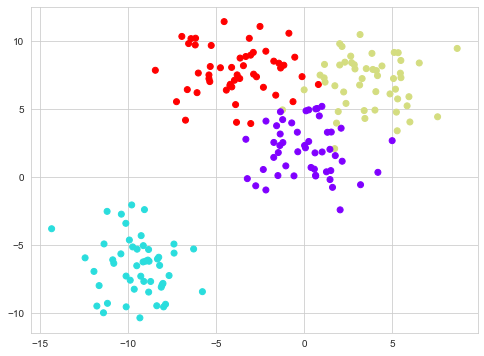

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

# KMeans

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=4)

In [9]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
kmeans.cluster_centers_

array([[-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-0.0123077 ,  2.13407664],
       [-4.13591321,  7.95389851]])

In [11]:
kmeans.labels_

array([3, 1, 2, 1, 1, 0, 1, 2, 1, 2, 3, 2, 1, 1, 3, 2, 1, 2, 0, 3, 0, 2,
       2, 0, 3, 0, 0, 2, 1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 0, 2, 0, 3, 3, 3,
       2, 1, 3, 2, 0, 2, 2, 3, 1, 2, 0, 3, 2, 2, 3, 1, 0, 1, 0, 3, 1, 2,
       0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 2, 3, 2, 2, 0, 1, 0, 2, 2, 2, 3,
       2, 0, 0, 0, 0, 2, 2, 0, 1, 3, 0, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 2, 3, 2, 3, 2, 1, 3, 2, 0, 3, 3, 3,
       2, 0, 0, 3, 1, 3, 1, 2, 0, 1, 0, 3, 3, 1, 2, 0, 3, 3, 3, 3, 2, 1,
       2, 3, 1, 1, 1, 2, 1, 2, 2, 3, 0, 3, 2, 1, 3, 2, 1, 2, 3, 1, 2, 3,
       1, 1, 0, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 1, 1, 3, 0, 2, 1, 1,
       0, 2])

In [12]:
kmeans.predict(data[0])

array([3, 1, 2, 1, 1, 0, 1, 2, 1, 2, 3, 2, 1, 1, 3, 2, 1, 2, 0, 3, 0, 2,
       2, 0, 3, 0, 0, 2, 1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 0, 2, 0, 3, 3, 3,
       2, 1, 3, 2, 0, 2, 2, 3, 1, 2, 0, 3, 2, 2, 3, 1, 0, 1, 0, 3, 1, 2,
       0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 2, 3, 2, 2, 0, 1, 0, 2, 2, 2, 3,
       2, 0, 0, 0, 0, 2, 2, 0, 1, 3, 0, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 2, 3, 2, 3, 2, 1, 3, 2, 0, 3, 3, 3,
       2, 0, 0, 3, 1, 3, 1, 2, 0, 1, 0, 3, 3, 1, 2, 0, 3, 3, 3, 3, 2, 1,
       2, 3, 1, 1, 1, 2, 1, 2, 2, 3, 0, 3, 2, 1, 3, 2, 1, 2, 3, 1, 2, 3,
       1, 1, 0, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 1, 1, 3, 0, 2, 1, 1,
       0, 2])

# Evaluations

In [20]:
pd.DataFrame({'real':data[1],'by_Kmeans':kmeans.labels_})

,real,by_Kmeans
0,3,2
1,2,0
2,0,3
3,2,0
4,2,0
...,...,...
195,0,3
196,2,0
197,2,0
198,1,1


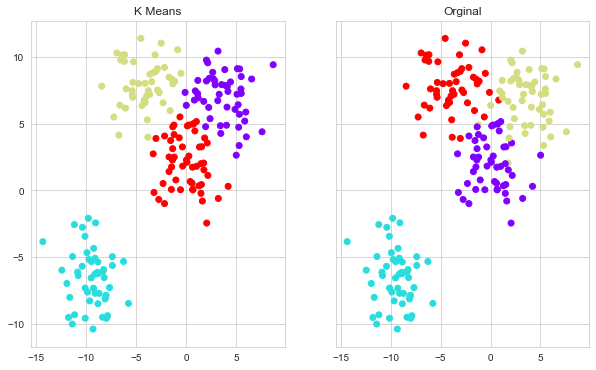

In [27]:
f , (ax1,ax2) = plt.subplots(1,2,figsize=(10,6),sharey=True)
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title('Orginal')
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')


# With 2 Clusters

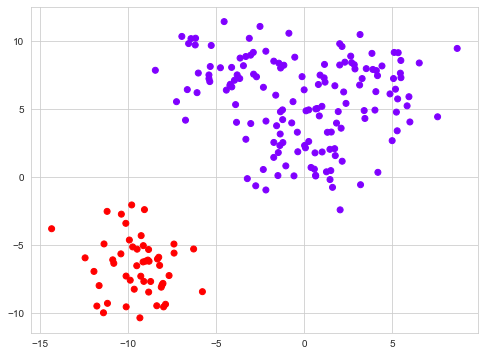

In [28]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data[0])
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
plt.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')

# With 3 Clusters

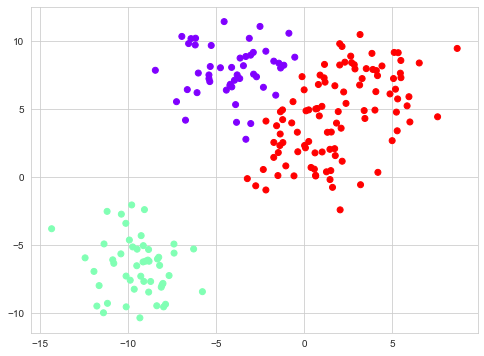

In [30]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[0])
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
plt.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')

# Scale Data

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[0])
data_scaled = scaler.transform(data[0])

In [36]:
kmeans1 = KMeans(n_clusters=4)
kmeans1.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

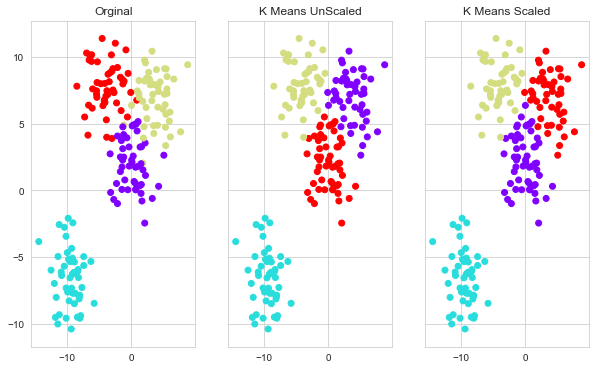

In [39]:
f , (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,6),sharey=True)
ax1.set_title('Orginal')
ax1.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')
ax2.set_title('K Means UnScaled')
ax2.scatter(data[0][:,0],data[0][:,1],c=kmeans1.labels_,cmap='rainbow')
ax3.set_title('K Means Scaled')
ax3.scatter(data[0][:,0],data[0][:,1],c=kmeans2.labels_,cmap='rainbow')

# Silhouette Score

In [31]:
from sklearn.metrics import silhouette_score

In [62]:
def optimal_kmeans(dataset,normalized_dataset,start=2,end=11):
    n_clu = []
    km_ss = []
    for n_clusters in range(start,end):
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(normalized_dataset)
        silhouette_avg = round(silhouette_score(dataset,labels,random_state=1),3)
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)
        print('NO.Clusters : {}   ,Silhouette Score : {}'.format(n_clusters,silhouette_avg))
    if n_clusters == end -1 :
        plt.figure(figsize=(6.47,3))
        plt.title('Silhouette Score')
        sns.pointplot(x=n_clu,y=km_ss)

NO.Clusters : 2   ,Silhouette Score : 0.649
NO.Clusters : 3   ,Silhouette Score : 0.502
NO.Clusters : 4   ,Silhouette Score : 0.551
NO.Clusters : 5   ,Silhouette Score : 0.481
NO.Clusters : 6   ,Silhouette Score : 0.457
NO.Clusters : 7   ,Silhouette Score : 0.366
NO.Clusters : 8   ,Silhouette Score : 0.34
NO.Clusters : 9   ,Silhouette Score : 0.36
NO.Clusters : 10   ,Silhouette Score : 0.35


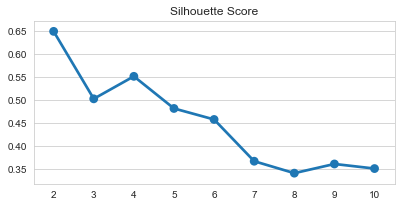

In [63]:
optimal_kmeans(data[0],data_scaled)

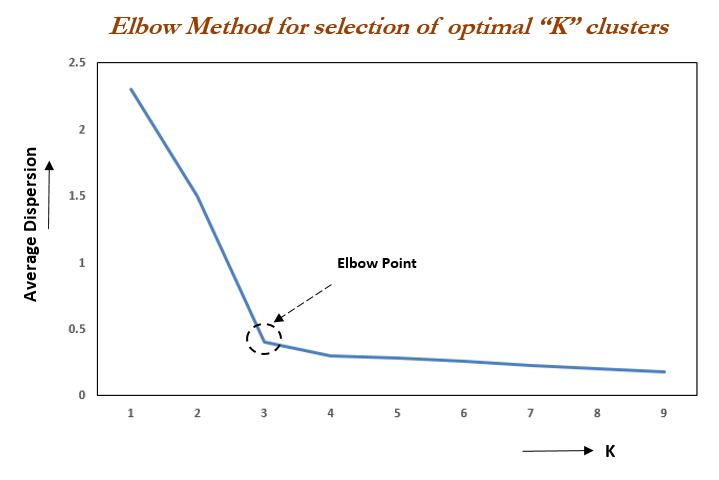

In [61]:
# ( بهترین انتخاب برای تعداد کلاستر، بزرگترین عددی است که از آنجا به بعد شیب کاهش اسکور کم می شود یا همان نقطه ی آرنج .)